# Exploratory Data Analysis (EDA)

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [3]:
df = pd.read_csv('Data/energy_data_cleaned.csv', encoding='latin1')
df = df.iloc[:, 1:]

In [4]:
df.shape

(4073, 31)

In [5]:
df.head()

,country,utility_name,utility_code,utility_ID,year,connection_type,total_number_connections,residential_connections,electricity_sold_year_MWh,distribution_length_km,...,residential_coverage (#/100 households),complaints_year,avg_duration_solution_hr,avg_residential_tarif_local,avg_industrial_tarif_local,installation_cost_residential_local,installation_cost_industrial_local,privatization_year,residential_connections_employee,energy_sold_employee
0,Paraguay,ADMINISTRACION NACIONAL DE ELECTRICIDAD (ANDE).,ANDE,209001,1995,Elec - Distribution,710188,579691,3605894.515,33415.54,...,0.694,43333,NaN,95460,68920,NaN,NaN,0,222.1038314,1381.56878
1,Paraguay,ADMINISTRACION NACIONAL DE ELECTRICIDAD (ANDE).,ANDE,209001,1996,Elec - Distribution,785280,647040,3802143.296,39952.04,...,0.747,45118,NaN,117960,85230,NaN,NaN,0,241.2527964,1417.652236
2,Paraguay,ADMINISTRACION NACIONAL DE ELECTRICIDAD (ANDE).,ANDE,209001,1997,Elec - Distribution,850947,707179,3973477.997,45892.74,...,0.79,49173,NaN,135140,95020,NaN,NaN,0,256.7824982,1442.802468
3,Paraguay,ADMINISTRACION NACIONAL DE ELECTRICIDAD (ANDE).,ANDE,209001,1998,Elec - Distribution,897494,749033,4079504.871,48422.2,...,0.816,49834,NaN,159890,110890,NaN,NaN,0,250.6803882,1365.296142
4,Paraguay,ADMINISTRACION NACIONAL DE ELECTRICIDAD (ANDE).,ANDE,209001,1999,Elec - Distribution,856545,719159,4815296.785,50637.75,...,0.823,38173,NaN,161702.9087,98855.26838,NaN,NaN,0,240.2000668,1608.315559


In [6]:
df.columns

Index(['country', 'utility_name', 'utility_code', 'utility_ID', 'year',
       'connection_type', 'total_number_connections',
       'residential_connections', 'electricity_sold_year_MWh',
       'distribution_length_km', 'num_employees', 'avg_price_MWh_local',
       'avg_transmission_charge_MWh_local', 'OPEX_local', 'CAPEX_local',
       'TOTEX_local', 'energy_losses_technical&nontechnical_%',
       'energy_losses_technical_%', 'energy_losses_nontechnical_%',
       'avg_duration_interruptions_suscriber',
       'avg_frequency_interruptions_subscriber',
       'residential_coverage (#/100 households)', 'complaints_year',
       'avg_duration_solution_hr', 'avg_residential_tarif_local',
       'avg_industrial_tarif_local', 'installation_cost_residential_local',
       'installation_cost_industrial_local', 'privatization_year',
       'residential_connections_employee', 'energy_sold_employee'],
      dtype='object')

### Data Cleaning

In [7]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by= ['count','%'], ascending=False)

,count,%
installation_cost_industrial_local,3921,96.268107
avg_duration_solution_hr,3738,91.775104
installation_cost_residential_local,3661,89.884606
avg_transmission_charge_MWh_local,3577,87.822244
energy_losses_nontechnical_%,3524,86.520992
complaints_year,3524,86.520992
energy_losses_technical_%,3520,86.422784
avg_price_MWh_local,3256,79.941075
CAPEX_local,2931,71.961699
avg_frequency_interruptions_subscriber,2792,68.548981


In [8]:
# Drop columns with more than 80% null values
thresh = len(df) * 0.2
df.dropna(thresh = thresh, axis=1, inplace = True)

In [9]:
# Convert numeric columns
df['year'] = pd.to_numeric(df['year'], errors='coerce')

for col in df.columns[6:]:
    df[col] = pd.to_numeric(df[col], errors ='coerce')

In [10]:
df.dtypes

country                                     object
utility_name                                object
utility_code                                object
utility_ID                                  object
year                                       float64
connection_type                             object
total_number_connections                   float64
residential_connections                    float64
electricity_sold_year_MWh                  float64
distribution_length_km                     float64
num_employees                              float64
avg_price_MWh_local                        float64
OPEX_local                                 float64
CAPEX_local                                float64
TOTEX_local                                float64
energy_losses_technical&nontechnical_%     float64
avg_duration_interruptions_suscriber       float64
avg_frequency_interruptions_subscriber     float64
residential_coverage (#/100 households)    float64
avg_residential_tarif_local    

In [11]:
# Fill in missing values with 0 for some columns
df[['total_number_connections', 'residential_connections', 'residential_coverage (#/100 households)']] =df[['total_number_connections', 'residential_connections', 'residential_coverage (#/100 households)']].fillna(0)

In [12]:
# Fill in missing values with mean
df.fillna(df.groupby('utility_name').transform('mean'), inplace=True)

In [13]:
print(df.isnull().sum())

country                                       0
utility_name                                  0
utility_code                                  0
utility_ID                                    9
year                                          1
connection_type                               0
total_number_connections                      0
residential_connections                       0
electricity_sold_year_MWh                    15
distribution_length_km                      811
num_employees                               155
avg_price_MWh_local                        2012
OPEX_local                                 1249
CAPEX_local                                1352
TOTEX_local                                1348
energy_losses_technical&nontechnical_%      403
avg_duration_interruptions_suscriber       1323
avg_frequency_interruptions_subscriber     1298
residential_coverage (#/100 households)       0
avg_residential_tarif_local                 767
avg_industrial_tarif_local              

In [18]:
# Fill in rest of null values with 0 to maintain columns numeric
df.fillna(0, inplace = True)

In [15]:
df.isnull().sum()

country                                    0
utility_name                               0
utility_code                               0
utility_ID                                 0
year                                       0
connection_type                            0
total_number_connections                   0
residential_connections                    0
electricity_sold_year_MWh                  0
distribution_length_km                     0
num_employees                              0
avg_price_MWh_local                        0
OPEX_local                                 0
CAPEX_local                                0
TOTEX_local                                0
energy_losses_technical&nontechnical_%     0
avg_duration_interruptions_suscriber       0
avg_frequency_interruptions_subscriber     0
residential_coverage (#/100 households)    0
avg_residential_tarif_local                0
avg_industrial_tarif_local                 0
privatization_year                         0
residentia

In [16]:
df.dtypes

country                                     object
utility_name                                object
utility_code                                object
utility_ID                                  object
year                                       float64
connection_type                             object
total_number_connections                   float64
residential_connections                    float64
electricity_sold_year_MWh                  float64
distribution_length_km                     float64
num_employees                              float64
avg_price_MWh_local                        float64
OPEX_local                                 float64
CAPEX_local                                float64
TOTEX_local                                float64
energy_losses_technical&nontechnical_%     float64
avg_duration_interruptions_suscriber       float64
avg_frequency_interruptions_subscriber     float64
residential_coverage (#/100 households)    float64
avg_residential_tarif_local    

### Analysis

I first want to analyze the amount of residential connections in the utility area by country

C:\Users\maria\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 145 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\maria\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\maria\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 145 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\maria\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 141 missing from current font.
  font.set_text(s, 0, flags=flags)


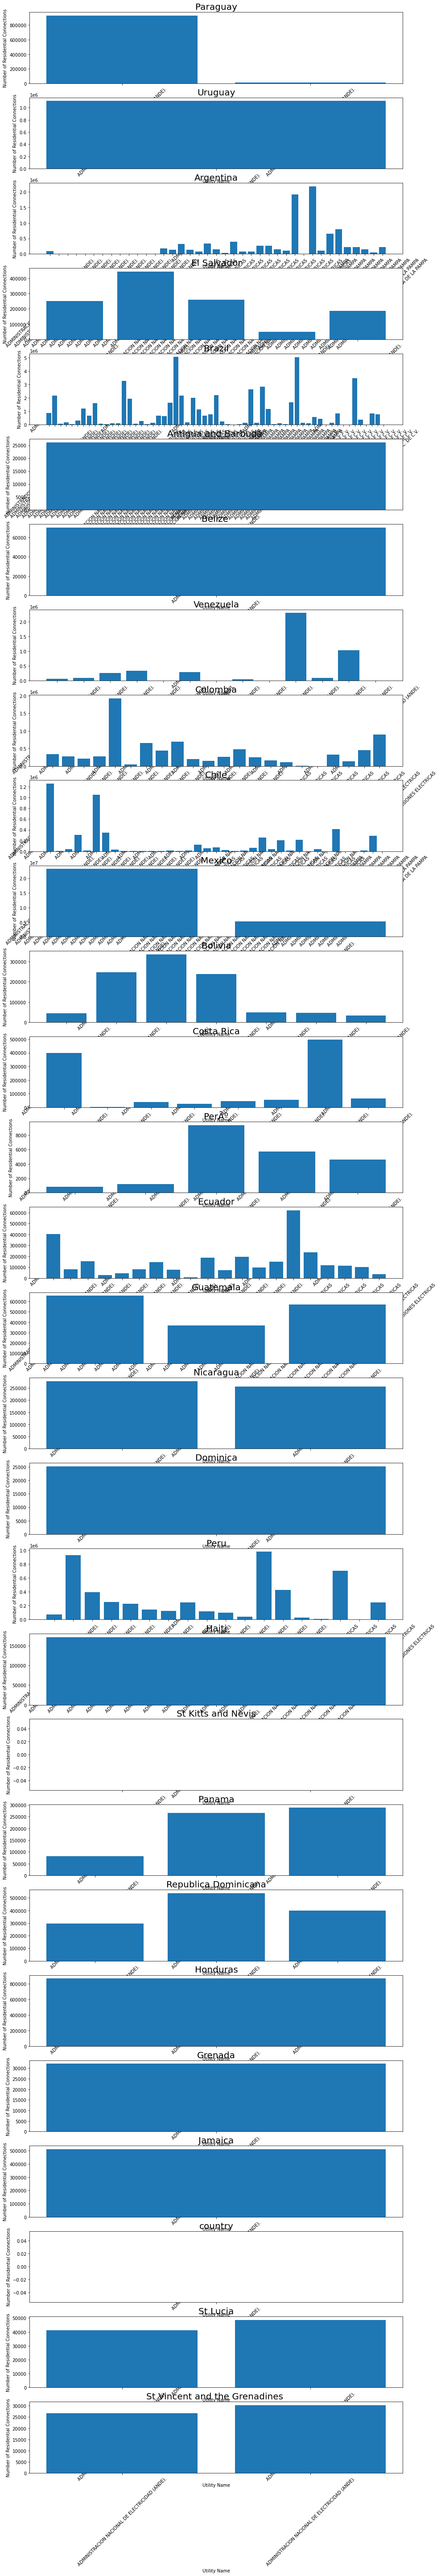

In [20]:
countries = list(df['country'].unique())
utility_labels = df['utility_name']
fig, ax = plt.subplots(nrows=len(countries), figsize=(15, len(countries)*3.5))

for i in countries:
    ind = countries.index(i)
    filt = df['country'] == i
    
    ax[ind].bar(df[filt]['utility_name'], df[filt]['residential_connections'])
    
    ax[ind].set_title(i, size = 20)
    ax[ind].set_xlabel('Utility Name')
    ax[ind].set_ylabel('Number of Residential Connections')
    ax[ind].set_xticklabels(utility_labels, rotation = 45)

plt.tight_layout()

In [21]:
# Save after EDA cleaning
df.to_csv('Data/energy_data_EDA.csv')